<h1> Fashion classification </h1>

Data set:

https://www.kaggle.com/datasets/zalando-research/fashionmnist

- Each row is a separate image

- Column 1 is the class label.

- Remaining columns are pixel numbers (784 total).

- Each value is the darkness of the pixel (1 to 255)

<h2> Functions </h2>

In [69]:
def describe_fashion(x, y):
    """
    Describes given fashion.
    input: x - row of X, y - target value
    """
    
    fashion = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover',
               3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt',
               7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
    
    pixels_to_image(x, 28, 28)
    
    print(fashion[y])

<h2> Settings and libraries </h2>

In [134]:
import pandas as pd
# import opendatasets as od
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

%run ml_functions.ipynb

In [3]:
# od.download(
#     "https://www.kaggle.com/datasets/zalando-research/fashionmnist")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 

 zlotuptaka


Your Kaggle Key: 

 ································


  0%|          | 0.00/68.8M [00:00<?, ?B/s]

100%|██████████| 68.8M/68.8M [00:08<00:00, 10.7MB/s]


<h2> First look </h2>

In [14]:
df_train = pd.read_csv("fashionmnist/fashion-mnist_train.csv")
df_test = pd.read_csv("fashionmnist/fashion-mnist_test.csv")

In [63]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


Separate class label column.

In [20]:
y_train = df_train["label"]
X_train = df_train.drop("label", axis=1)

y_test = df_test["label"]
X_test = df_test.drop("label", axis=1)

Convert numerical dfs to numpy arrays.

In [41]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

Show sample cloth.

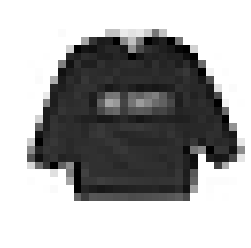

Pullover


In [154]:
describe_fashion(X_train[0], y_train[0])

Check for nans

In [148]:
df_train.isnull().values.any()

False

Check if any column is const.

In [160]:
for col in df_train:
    if len(df_train[col].unique()) == 0:
        print(col, 'is const.')